In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
proteins = pd.read_csv("proteins_cleaned.csv")
%matplotlib inline

lets take a look at the missing values

In [69]:
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346321 entries, 0 to 346320
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                346321 non-null  int64  
 1   index                     346321 non-null  int64  
 2   structureId               346321 non-null  object 
 3   chainId                   346319 non-null  object 
 4   sequence                  346321 non-null  object 
 5   residueCount              346321 non-null  int64  
 6   macromoleculeType         346321 non-null  object 
 7   classification            346321 non-null  object 
 8   experimentalTechnique     346321 non-null  object 
 9   resolution                330228 non-null  float64
 10  structureMolecularWeight  346321 non-null  float64
 11  crystallizationMethod     240593 non-null  object 
 12  crystallizationTempK      243930 non-null  float64
 13  densityMatthews           307477 non-null  f

Let's take a look at the types of molecues

In [70]:
top_15 = list(proteins['classification'].value_counts()[:15].index)
top_15

['HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'LYASE',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'VIRUS',
 'SIGNALING PROTEIN',
 'ISOMERASE',
 'LIGASE',
 'MEMBRANE PROTEIN',
 'PROTEIN BINDING']

The paper used 10 classes and got fairly accurate classes. I will try using the top 15 classes and see how well of a model I get

In [71]:
proteins[proteins['classification'].isin(top_15)]

,Unnamed: 0,index,structureId,chainId,sequence,residueCount,macromoleculeType,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,num_residues
27,27,67,117E,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein,HYDROLASE,X-RAY DIFFRACTION,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,286
28,28,68,117E,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572,Protein,HYDROLASE,X-RAY DIFFRACTION,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,286
31,31,74,11AS,A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,660,Protein,LIGASE,X-RAY DIFFRACTION,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0,330
32,32,75,11AS,B,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,660,Protein,LIGASE,X-RAY DIFFRACTION,2.50,73530.97,NaN,NaN,2.30,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.5,1998.0,330
33,33,76,11BA,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248,Protein,HYDROLASE,X-RAY DIFFRACTION,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346293,346297,471118,9JDW,A,STQAATASSRNSCAADDKATEPLPKDCPVSSYNEWDPLEEVIVGRA...,386,Protein,TRANSFERASE,X-RAY DIFFRACTION,2.50,44444.61,NaN,NaN,3.83,68.00,pH 7.0,7.0,1999.0,386
346298,346302,471123,9LPR,A,ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...,203,Protein,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,2.20,20455.54,NaN,NaN,2.50,50.88,NaN,NaN,1991.0,198
346299,346303,471124,9LPR,P,XAAPL,203,Protein,HYDROLASE/HYDROLASE INHIBITOR,X-RAY DIFFRACTION,2.20,20455.54,NaN,NaN,2.50,50.88,NaN,NaN,1991.0,5
346302,346306,471130,9NSE,A,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,888,Protein,OXIDOREDUCTASE,X-RAY DIFFRACTION,2.24,102350.65,NaN,NaN,2.41,50.00,pH 6.5,6.5,2000.0,444


In [72]:
proteins['classification'].value_counts()[:15].sum()

215917

Subset and overwite oringal frame

In [73]:
proteins = proteins[proteins['classification'].isin(top_15)]
#grab only the sequence and classification column
proteins = proteins[['sequence','classification']]
proteins.head()


,sequence,classification
27,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,HYDROLASE
28,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,HYDROLASE
31,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,LIGASE
32,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,LIGASE
33,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,HYDROLASE


Drop nans

In [74]:
proteins.shape

(215917, 2)

In [75]:
proteins = proteins.dropna()

In [76]:
proteins.shape

(215917, 2)

## Transform the labels

In [77]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(proteins['classification'])

In [78]:
lb.classes_

array(['HYDROLASE', 'HYDROLASE/HYDROLASE INHIBITOR', 'IMMUNE SYSTEM',
       'ISOMERASE', 'LIGASE', 'LYASE', 'MEMBRANE PROTEIN',
       'OXIDOREDUCTASE', 'PROTEIN BINDING', 'SIGNALING PROTEIN',
       'TRANSCRIPTION', 'TRANSFERASE', 'TRANSPORT PROTEIN',
       'VIRAL PROTEIN', 'VIRUS'], dtype='<U29')

In [79]:
Y[46]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [80]:
proteins['classification'].iloc[46]

'VIRAL PROTEIN'

# Note the labels are in order
* in the paper they assign, each amino acid a a number
* look up table is created, and instead of using the letter, they assign it a number
* so there is no LSTM of RNN working here
* lets try this way, first and see if we can make it better with an LSTM

In [81]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 512

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(proteins['sequence'])
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(proteins['sequence'])
X = sequence.pad_sequences(X, maxlen=max_length)

In [82]:
X[67585]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [83]:
tokenizer.word_counts

OrderedDict([('t', 3526606),
             ('y', 2191172),
             ('r', 3113466),
             ('q', 2329484),
             ('i', 3500342),
             ('g', 4752966),
             ('a', 5113175),
             ('k', 3427697),
             ('n', 2615421),
             ('l', 5621440),
             ('e', 4032399),
             ('v', 4391183),
             ('d', 3549805),
             ('p', 2986052),
             ('s', 3954789),
             ('f', 2475953),
             ('h', 1719828),
             ('m', 1485899),
             ('w', 886318),
             ('c', 849748),
             ('u', 48),
             ('x', 195427),
             ('z', 47),
             ('b', 30),
             ('o', 2)])

In [84]:
tokenizer.word_index

{'l': 1,
 'a': 2,
 'g': 3,
 'v': 4,
 'e': 5,
 's': 6,
 'd': 7,
 't': 8,
 'i': 9,
 'k': 10,
 'r': 11,
 'p': 12,
 'n': 13,
 'f': 14,
 'q': 15,
 'y': 16,
 'h': 17,
 'm': 18,
 'w': 19,
 'c': 20,
 'x': 21,
 'u': 22,
 'z': 23,
 'b': 24,
 'o': 25}

###  First Modeling
* Only use top 15 proteins by count

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

embedding_dim = 12

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 512, 12)           312       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 512, 64)           4672      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 256, 64)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 256, 32)           6176      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 128, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               524416    
__________

In [94]:
X.shape

(215917, 512)

In [95]:
Y.shape

(215917, 15)

Split into train, test, and valid

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.1)

In [97]:
#keep X_test and y_test until the end get valids
X_test.shape
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.1)

In [98]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=40, batch_size=128)

Train on 174892 samples, validate on 19433 samples
Epoch 1/40
  6528/174892 [>.............................] - ETA: 3:57 - loss: 2.3646 - acc: 0.2137

KeyboardInterrupt: 

In [460]:
model1_history = pd.DataFrame(model.history.history)

In [461]:
model1_history.to_csv("model1_history.csv")

In [474]:
model.save('protein_seq_model1.h5')

In [475]:
model.save_weights('protein_seq_model1_weights.h5')

## Diagnostic Plots

Plot the losses first

<Figure size 576x576 with 0 Axes>

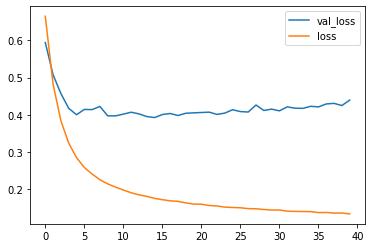

<Figure size 576x576 with 0 Axes>

In [470]:
plt.figure(figsize=(8,8))
model1_history[['val_loss','loss']].plot.line()
plt.figure(figsize=(8,8))
plt.show()


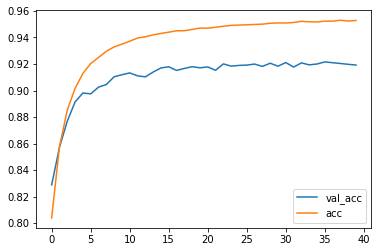

In [472]:
model1_history[['val_acc','acc']].plot.line()

## Get accuracies,f1,blah blah all the she bang

In [473]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

train-acc = 0.9546729114608544
test-acc = 0.9148387552541415


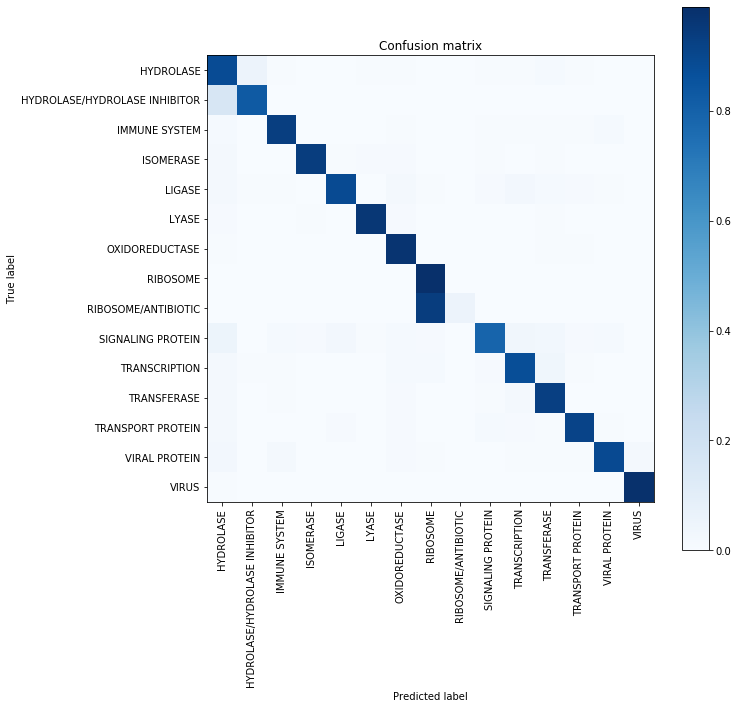

In [476]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The model is having a hard time trying to tell the difference between Ribosome and Ribsome/Antibiotic

In [478]:
np.diag(cm)

array([0.88, 0.83, 0.93, 0.94, 0.89, 0.96, 0.97, 0.99, 0.06, 0.79, 0.88,
       0.93, 0.91, 0.89, 0.98])

In [479]:
print(classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(test_pred, axis=1), 
                            target_names=lb.classes_))

                               precision    recall  f1-score   support

                    HYDROLASE       0.91      0.88      0.90      4754
HYDROLASE/HYDROLASE INHIBITOR       0.77      0.83      0.80      1160
                IMMUNE SYSTEM       0.95      0.93      0.94      1675
                    ISOMERASE       0.93      0.94      0.93       639
                       LIGASE       0.88      0.89      0.88       469
                        LYASE       0.95      0.96      0.96      1218
               OXIDOREDUCTASE       0.96      0.97      0.96      3500
                     RIBOSOME       0.91      0.99      0.95      5985
          RIBOSOME/ANTIBIOTIC       0.75      0.06      0.11       572
            SIGNALING PROTEIN       0.83      0.79      0.81       645
                TRANSCRIPTION       0.85      0.88      0.86      1090
                  TRANSFERASE       0.95      0.93      0.94      3805
            TRANSPORT PROTEIN       0.89      0.91      0.90       858
     

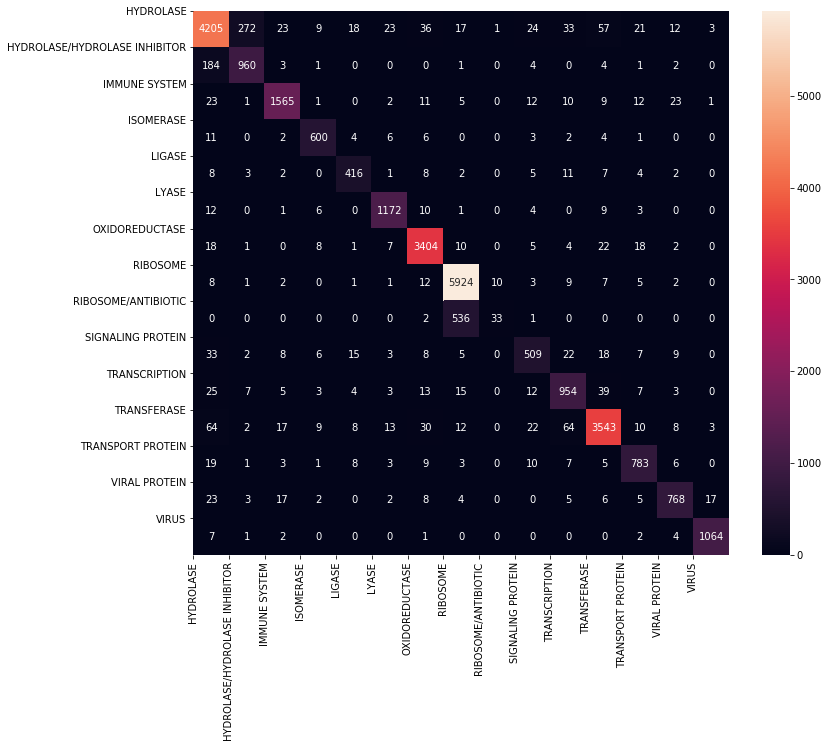

In [491]:
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), 
                             np.argmax(test_pred, axis=1)), annot=True, fmt="d")
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_,rotation=0)
plt.show()

Things to try:
* change the input representation (each as a one hot encoded vector of AM) then try 2d conv
* retain memory of sequences by using LSTM or RNN
* change the architecture, use a different sized embedding

Notes on conv1d
https://stackoverflow.com/questions/52352522/how-does-keras-1d-convolution-layer-work-with-word-embeddings-text-classificat

LSTM
https://medium.com/@david.campion/text-generation-using-bidirectional-lstm-and-doc2vec-models-1-3-8979eb65cb3a

RNN 
http://karpathy.github.io/2015/05/21/rnn-effectiveness/

Shaping RNNS
https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

In [10]:
import keras
from keras.models import load_model

In [12]:
model = load_model("protein_seq_model1.h5")

In [21]:
emb = model.layers[0].get_weights()[0]

In [47]:
emb.shape

(26, 12)

In [24]:
import umap.umap_ as umap

In [31]:
reducer = umap.UMAP(n_components=4)
embedding = reducer.fit_transform(emb)

In [32]:
embedding.shape

(26, 4)

In [102]:
import plotly.express as px
df = pd.DataFrame(embedding)
df = df.iloc[0:25,:]
df['Amino_Acid'] =  tokenizer.word_index.keys()

In [109]:
fig = px.scatter_3d(df, x=0, y=1, z=2,text='Amino_Acid',color='Amino_Acid')
fig.update_layout(scene = dict(
                    xaxis_title='UMAP Dimension 1',
                    yaxis_title='UMAP Dimension 2',
                    zaxis_title='UMAP Dimension 3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

In [114]:
import scipy

In [116]:
emb.shape

(26, 12)

In [153]:
scipy.spatial.distance.cosine(emb[0,:],emb[0,:])

0.0

In [121]:
X.shape

(215917, 512)

In [125]:
emb[25,:]

array([ 0.01369827,  0.09290116, -0.21902865,  0.6512373 , -0.17648032,
        0.04461827,  0.29898632,  0.2374944 ,  0.49058178, -0.4821217 ,
        0.17068154,  0.25401416], dtype=float32)

In [146]:
results = np.zeros((25,25))
for i in range(0,25):
    for j in range(i,25):
        results[i,j] = np.round(scipy.spatial.distance.cosine(emb[i,:],emb[j,:]),1)


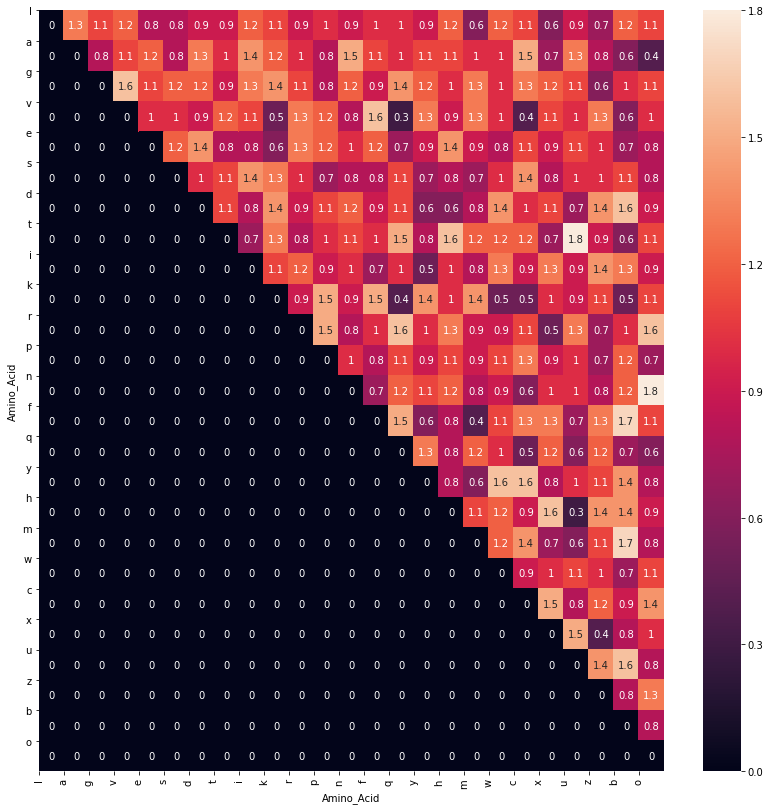

In [152]:
plt.figure(figsize=(14,14))
sns.heatmap(results, annot=True)
tick_marks = np.arange(len(results))
plt.xticks(tick_marks, list(tokenizer.word_index.keys()), rotation=90)
plt.yticks(tick_marks, list(tokenizer.word_index.keys()),rotation=0)
plt.xlabel('Amino_Acid')
plt.ylabel('Amino_Acid')
plt.show()

In [133]:
len(results)

25